**DATA IMPORTATION**

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('loan_data.csv')
df.head()

,credit_criteria_meet,purpose,interest_rate,installment,log_of_income,debt_income_ratio,fico_score,days_with_credit_line,revolving_balance,revolving_utilization,inquiry_last_6months,times_surpassed_payment_in_2yrs,derogatory_public_record,loan_defaulted
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


**DATA PROFILING**

In [2]:
df.shape

(9578, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   credit_criteria_meet             9578 non-null   int64  
 1   purpose                          9578 non-null   object 
 2   interest_rate                    9578 non-null   float64
 3   installment                      9578 non-null   float64
 4   log_of_income                    9578 non-null   float64
 5   debt_income_ratio                9578 non-null   float64
 6   fico_score                       9578 non-null   int64  
 7   days_with_credit_line            9578 non-null   float64
 8   revolving_balance                9578 non-null   int64  
 9   revolving_utilization            9578 non-null   float64
 10  inquiry_last_6months             9578 non-null   int64  
 11  times_surpassed_payment_in_2yrs  9578 non-null   int64  
 12  derogatory_public_re

In [4]:
df.isnull().sum()

credit_criteria_meet               0
purpose                            0
interest_rate                      0
installment                        0
log_of_income                      0
debt_income_ratio                  0
fico_score                         0
days_with_credit_line              0
revolving_balance                  0
revolving_utilization              0
inquiry_last_6months               0
times_surpassed_payment_in_2yrs    0
derogatory_public_record           0
loan_defaulted                     0
dtype: int64

In [5]:
import plotly.express as px
import matplotlib.pyplot as plt

fig = px.histogram(df, x = 'credit_criteria_meet', color = 'credit_criteria_meet', title= 'Distribution of  Loan Credibility Status')
fig.show()

In [6]:

fig2 = px.histogram(df, x = 'loan_defaulted', color = 'loan_defaulted', title= 'Distribution of Loan Defaulters')
fig2.show()

**DATA PREPROCESSING**

In [7]:
df.head()

,credit_criteria_meet,purpose,interest_rate,installment,log_of_income,debt_income_ratio,fico_score,days_with_credit_line,revolving_balance,revolving_utilization,inquiry_last_6months,times_surpassed_payment_in_2yrs,derogatory_public_record,loan_defaulted
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [16]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns to scale
columns_to_scale = ['interest_rate', 'installment', 'log_of_income', 'debt_income_ratio',
                     'fico_score', 'days_with_credit_line', 'revolving_balance', 'revolving_utilization']

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

label_encoder = LabelEncoder ()
#fit and transform purpose column
df ['purpose'] = label_encoder.fit_transform(df['purpose'])
df.head()

,credit_criteria_meet,purpose,interest_rate,installment,log_of_income,debt_income_ratio,fico_score,days_with_credit_line,revolving_balance,revolving_utilization,inquiry_last_6months,times_surpassed_payment_in_2yrs,derogatory_public_record,loan_defaulted
0,1,2,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,0,0,0,0
1,1,1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,0,0,0,0
2,1,2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,1,0,0,0
3,1,2,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,1,0,0,0
4,1,1,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,0,1,0,0


In [17]:
X = df.drop(['loan_defaulted'], axis = 1)
y = df['loan_defaulted']

In [18]:
from sklearn.model_selection import train_test_split
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [19]:
from ast import Param
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Param_grid = {'n_neighbors': np.arange(1, 25)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, Param_grid, cv = 5)
knn_cv.fit(X_train, y_train)

print("Best Parameters:", knn_cv.best_params_)
print("Best Score:", knn_cv.best_score_)

Best Parameters: {'n_neighbors': 20}
Best Score: 0.8389456329761776


In [21]:
best_param = knn_cv.best_params_['n_neighbors']
knn_best = KNeighborsClassifier(n_neighbors = best_param)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[1609,    2],
       [ 305,    0]], dtype=int64)

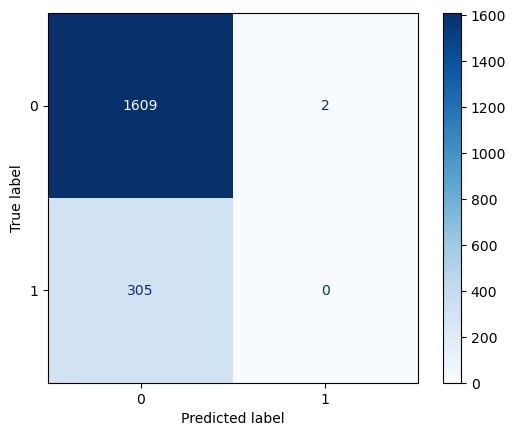

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.show()

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(100, input_shape=(X_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Use early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history1 = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

c:\Users\muran\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.6149 - loss: 0.7917 - val_accuracy: 0.8403 - val_loss: 0.4242
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7877 - loss: 0.5258 - val_accuracy: 0.8408 - val_loss: 0.4151
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8154 - loss: 0.4846 - val_accuracy: 0.8424 - val_loss: 0.4076
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8257 - loss: 0.4600 - val_accuracy: 0.8413 - val_loss: 0.4087
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8361 - loss: 0.4345 - val_accuracy: 0.8419 - val_loss: 0.4071
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8340 - loss: 0.4303 - val_accuracy: 0.8413 - val_loss: 0.4069
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8458 - loss: 0.4236 - val_accuracy: 0.8413 - val_loss: 0.4067
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8387 - loss: 0.4272 - val_ac

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with RMSprop optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Use early stopping and learning rate reduction on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history2 = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

c:\Users\muran\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5644 - loss: 2.2391 - val_accuracy: 0.8413 - val_loss: 1.5019 - learning_rate: 0.0010
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7620 - loss: 1.5200 - val_accuracy: 0.8413 - val_loss: 1.1530 - learning_rate: 0.0010
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8212 - loss: 1.1501 - val_accuracy: 0.8403 - val_loss: 0.9097 - learning_rate: 0.0010
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8145 - loss: 0.9321 - val_accuracy: 0.8408 - val_loss: 0.7465 - learning_rate: 0.0010
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8366 - loss: 0.7417 - val_accuracy: 0.8419 - val_loss: 0.6379 - learning_rate: 0.0010
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8264 - loss: 0.6547 - val_accuracy: 0.8419 - val_loss: 0.5645 - learning_rate: 0.0010
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8305 - loss: 0